Problem 2

Create a flower classifier based on the dataset here: https://www.kaggle.com/rishitchs/final-flowers-course-project-dataset

I think that directory contains essentially a duplicated dataset, use the one in Flowers-dataset-revised/newFlowers

Before starting, move 20% of the images in each directory (i.e. each flower type) to use as a test set.

For our first attempt, try building your own model from scratch

(A subsequent assignment will be to use transfer learning)

In [1]:
import os, shutil

In [3]:
# move 20% of the images in each directory (i.e. each flower type) to use as a test set. 

In [5]:
base_dir = "/home/ubuntu/deep_learning_with_python/Flowers_Dataset_Revised/Flowers_Dataset_Revised/newFlowers/"

In [27]:
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 


In [28]:
train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_rose_dir = os.path.join(train_dir, 'rose')
train_sunflower_dir = os.path.join(train_dir, 'sunflower')
train_tulip_dir = os.path.join(train_dir, 'tulip')

test_daisy_dir = os.path.join(test_dir, 'daisy')
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
test_rose_dir = os.path.join(test_dir, 'rose')
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
test_tulip_dir = os.path.join(test_dir, 'tulip')


In [29]:
print('total training daisy images:', len(os.listdir(train_daisy_dir)))
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training rose images:', len(os.listdir(train_rose_dir)))
print('total training sunflower images:', len(os.listdir(train_sunflower_dir)))
print('total training tulip images:', len(os.listdir(train_tulip_dir)))


total training daisy images: 598
total training dandelion images: 824
total training rose images: 584
total training sunflower images: 560
total training tulip images: 749


In [30]:
print('total test daisy images:', len(os.listdir(test_daisy_dir)))
print('total test dandelion images:', len(os.listdir(test_dandelion_dir)))
print('total test rose images:', len(os.listdir(test_rose_dir)))
print('total test sunflower images:', len(os.listdir(test_sunflower_dir)))
print('total test tulip images:', len(os.listdir(test_tulip_dir)))


total test daisy images: 148
total test dandelion images: 204
total test rose images: 144
total test sunflower images: 138
total test tulip images: 186


In [31]:
pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.9/site-packages
Requires: astunparse, opt-einsum, protobuf, six, numpy, gast, flatbuffers, wheel, termcolor, tensorflow-estimator, google-pasta, typing-extensions, grpcio, wrapt, tensorboard, keras-preprocessing, absl-py, h5py
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
!pip install keras==2.4.3
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /opt/conda/lib/python3.9/site-packages
Requires: scipy, h5py, numpy, pyyaml
Required-by: 


In [21]:
from keras import layers
from keras import models

In [63]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(5, activation='softmax'))

In [64]:
# look at the dimentions of the feature map changes with every succesive layer 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [65]:
# configure the model for training
# use RMSprop optimizer, because this network ends up with a single sigmoid unit 
from keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

In [77]:
# data preprocessing 
# using ImageDataGenerator to read images from direcories 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # rescale all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( 
    train_dir, # target directory 
    target_size=(150, 150), # resize all images to 150X150
    batch_size=20,
    class_mode='categorical') # because we use binary_crossentropy loss, we need binary labels 

validation_generator = test_datagen.flow_from_directory( 
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 3315 images belonging to 5 classes.
Found 820 images belonging to 5 classes.


In [67]:
# the generator yields these batches indef- initely: 
# it loops endlessly over the images in the target folder. 
# For this reason, you need to break the iteration loop at some point:

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


In [92]:
# need to figure out steps_per_epoch, # of epochs and validation steps 
# batch size 20, so steps_per_epoch should be 
3315/20 # until you see you target the entire 3315 samples 

165.75

In [93]:
# 
820/20 # validation steps 

41.0

In [95]:
# fit the model using a batch generator 

history = model.fit( 
      train_generator,
      steps_per_epoch=165,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=41) # took about 30min to run this 

Epoch 1/30
165/165 [==============================] - 89s 537ms/step - loss: 0.5905 - acc: 0.9150 - val_loss: 0.5566 - val_acc: 0.9198
Epoch 2/30
165/165 [==============================] - 89s 538ms/step - loss: 0.5823 - acc: 0.9143 - val_loss: 0.5583 - val_acc: 0.9188
Epoch 3/30
165/165 [==============================] - 89s 538ms/step - loss: 0.5776 - acc: 0.9192 - val_loss: 0.6075 - val_acc: 0.9141
Epoch 4/30
165/165 [==============================] - 89s 536ms/step - loss: 0.5695 - acc: 0.9170 - val_loss: 0.6620 - val_acc: 0.9124
Epoch 5/30
165/165 [==============================] - 89s 536ms/step - loss: 0.5593 - acc: 0.9195 - val_loss: 0.6229 - val_acc: 0.9112
Epoch 6/30
165/165 [==============================] - 88s 534ms/step - loss: 0.5627 - acc: 0.9201 - val_loss: 0.5385 - val_acc: 0.9234
Epoch 7/30
165/165 [==============================] - 89s 538ms/step - loss: 0.5622 - acc: 0.9185 - val_loss: 0.5729 - val_acc: 0.9139
Epoch 8/30
165/165 [==============================] - 8

In [96]:
# saving the model 
model.save('flower_1.h5')

In [97]:
# plot the loss and accuracy of the model 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']


<Figure size 432x288 with 0 Axes>

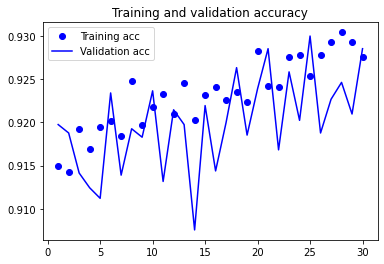

<Figure size 432x288 with 0 Axes>

In [98]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

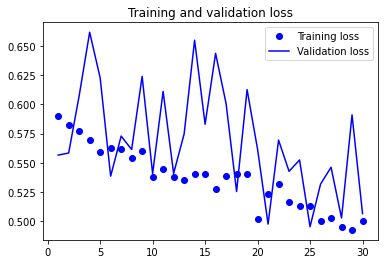

In [99]:
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show() 

In [100]:
# using data augmentation 
# setting up data augmentation configuration via ImageDataGenerator
# Data augmentation takes the approach of generating more training data from existing training samples, 
# by augmenting the samples via a number of random transformations that yield believable-looking images.
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2, 
      height_shift_range=0.2, 
      shear_range=0.2, 
      zoom_range=0.2, 
      horizontal_flip=True, 
      fill_mode='nearest')

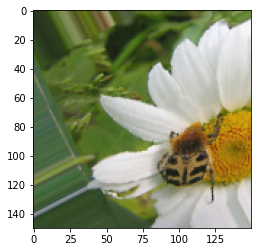

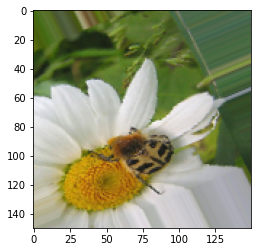

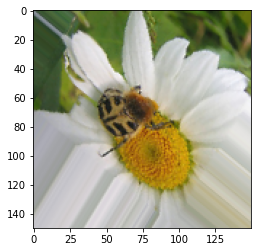

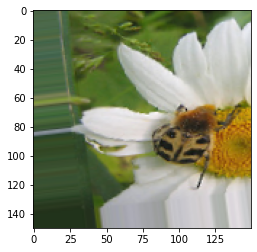

In [101]:
# display some randomly augmented training images 
from keras.preprocessing import image

fnames = [os.path.join(train_daisy_dir, fname) for # module with image-preprocessed utilities
          fname in os.listdir(train_daisy_dir)]

img_path = fnames[3] # choose one image to augment

img = image.load_img(img_path, target_size=(150, 150)) # reads the image and resize it 

x = image.img_to_array(img) # converts to Numpy array with shape (150, 150 3)

x = x.reshape((1,) + x.shape) # reshape it to (1, 150, 150, 3)

# generate batches of randomly transformed images, loops indefinitely, 
# so you need to break the loop at some point
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1
    if i % 4 == 0:
        break 

plt.show()

In [102]:
# defining a new convnet that includes dropout 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) # dropout layer 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [103]:
# train the network using data augmentation and dropout 
# data augmentation 
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # note that the validation data should not be augmented


In [104]:
# preprocess the data to format them to the required size and type 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( 
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 3315 images belonging to 5 classes.
Found 820 images belonging to 5 classes.


In [106]:
# model fit 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=165,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=41)

Epoch 1/50
165/165 [==============================] - 89s 541ms/step - loss: 1.4921 - acc: 0.8016 - val_loss: 1.3202 - val_acc: 0.8012
Epoch 2/50
165/165 [==============================] - 90s 543ms/step - loss: 1.2473 - acc: 0.8042 - val_loss: 1.1646 - val_acc: 0.8190
Epoch 3/50
165/165 [==============================] - 90s 544ms/step - loss: 1.1912 - acc: 0.8104 - val_loss: 1.1640 - val_acc: 0.8183
Epoch 4/50
165/165 [==============================] - 90s 543ms/step - loss: 1.1407 - acc: 0.8188 - val_loss: 1.1209 - val_acc: 0.8146
Epoch 5/50
165/165 [==============================] - 90s 544ms/step - loss: 1.0990 - acc: 0.8318 - val_loss: 1.0299 - val_acc: 0.8398
Epoch 6/50
165/165 [==============================] - 90s 544ms/step - loss: 1.0751 - acc: 0.8350 - val_loss: 0.9630 - val_acc: 0.8507
Epoch 7/50
165/165 [==============================] - 90s 543ms/step - loss: 1.0347 - acc: 0.8412 - val_loss: 0.9195 - val_acc: 0.8646
Epoch 8/50
165/165 [==============================] - 9

In [107]:
# saving the model 
model.save('flower_2.h5')

In [108]:
# plot the loss and accuracy of the model 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

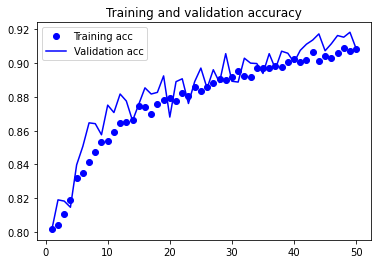

<Figure size 432x288 with 0 Axes>

In [109]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

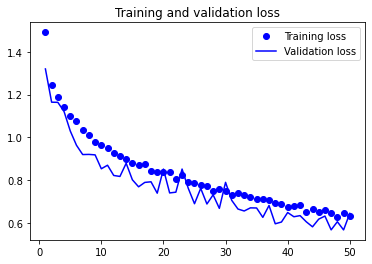

In [110]:
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show() 

In [111]:
# use pretrained model 
# feature extraction 
# instantiating the VGG16 convolutional base 
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [112]:
# detail of the architecture of the VGG16 convolutional base 
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [113]:
# fast feature extract without data augmentation 
# extract features using the pretrained convolutional base 
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/home/ubuntu/deep_learning_with_python/Flowers_Dataset_Revised/Flowers_Dataset_Revised/newFlowers/"
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'test') 

datagen = ImageDataGenerator(rescale=1./255) 
# class ImageDataGenerator is contained in Python, which can automatically
# turn image files on disk into batches of preprocessed tensors 
batch_size = 20


In [114]:
datagen.flow_from_directory

<bound method ImageDataGenerator.flow_from_directory of <tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x7f96cb1284c0>>

In [119]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) 
    labels = np.zeros(shape=(sample_count, 5)) # change this code for categorical modeling instead of binary 
    generator = datagen.flow_from_directory(
        directory, # target directory
        target_size=(150, 150), # resize all images to 150*150
        batch_size=batch_size, 
        class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        # don't understand how batch size 20 is kept in the final shape, maybe they are not, 
        # just the features are extracted in batches 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
            # note that because generators yield data indefinitely in a loop, you must break 
            # after every image has been seen once 
    return features, labels 


In [121]:
train_features, train_labels = extract_features(train_dir, 3315) 
validation_features, validation_labels = extract_features(validation_dir, 820) 
#test_features, test_labels = extract_features(test_dir, 1000)

Found 3315 images belonging to 5 classes.


In [122]:
# need to feed them to a densely connected classifer, so first need to flatten them to (sample, 8192)
train_features = np.reshape(train_features, (3315, 4 * 4 * 512)) 
validation_features = np.reshape(validation_features, (820, 4 * 4 * 512)) 
#test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [124]:
# define and train the densely connected classifer 
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512)) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, 
                    train_labels, 
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


Epoch 1/30
166/166 [==============================] - 2s 11ms/step - loss: 1.6803 - acc: 0.2862 - val_loss: 1.1066 - val_acc: 0.6085
Epoch 2/30
166/166 [==============================] - 2s 10ms/step - loss: 1.1145 - acc: 0.5720 - val_loss: 0.8918 - val_acc: 0.7024
Epoch 3/30
166/166 [==============================] - 2s 10ms/step - loss: 0.9146 - acc: 0.6621 - val_loss: 0.7820 - val_acc: 0.7439
Epoch 4/30
166/166 [==============================] - 2s 10ms/step - loss: 0.7992 - acc: 0.7187 - val_loss: 0.7204 - val_acc: 0.7610
Epoch 5/30
166/166 [==============================] - 2s 10ms/step - loss: 0.7309 - acc: 0.7561 - val_loss: 0.6682 - val_acc: 0.7646
Epoch 6/30
166/166 [==============================] - 2s 10ms/step - loss: 0.6968 - acc: 0.7568 - val_loss: 0.6477 - val_acc: 0.7744
Epoch 7/30
166/166 [==============================] - 2s 10ms/step - loss: 0.6255 - acc: 0.7784 - val_loss: 0.6158 - val_acc: 0.7805
Epoch 8/30
166/166 [==============================] - 2s 10ms/step - 

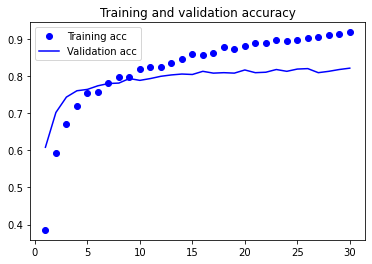

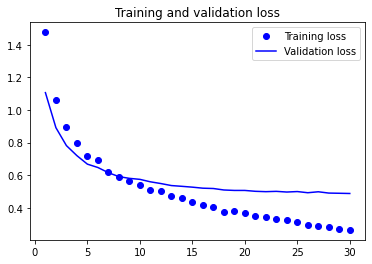

In [125]:
# look at the loss and accuracy curves during training 
# plot the result 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [126]:
# feature extraction with data augmentation 
# extending the conv_base model and running it end to end on the input 
# add a densely connected classifier on top of the convolutional base 
from keras import models
from keras import layers
model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(5, activation='softmax'))

In [127]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 1285      
Total params: 16,813,381
Trainable params: 16,813,381
Non-trainable params: 0
_________________________________________________________________


In [128]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [129]:
conv_base.trainable = False

In [130]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [131]:
# train the model end to end with a frozen convolutional base 
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers

train_datagen = ImageDataGenerator( # data augmentation 
        rescale=1./255,
        rotation_range=40, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        shear_range=0.2, 
        zoom_range=0.2, 
        horizontal_flip=True, 
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # Note that the validation data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


Found 3315 images belonging to 5 classes.
Found 820 images belonging to 5 classes.


In [132]:
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=165,
      epochs=30, 
      validation_data=validation_generator,
      validation_steps=41)

Epoch 1/30
165/165 [==============================] - 450s 3s/step - loss: 0.4765 - acc: 0.8261 - val_loss: 0.5341 - val_acc: 0.7988
Epoch 2/30
165/165 [==============================] - 448s 3s/step - loss: 0.4553 - acc: 0.8319 - val_loss: 0.5174 - val_acc: 0.8012
Epoch 3/30
165/165 [==============================] - 448s 3s/step - loss: 0.4548 - acc: 0.8352 - val_loss: 0.5349 - val_acc: 0.7988
Epoch 4/30
165/165 [==============================] - 448s 3s/step - loss: 0.4547 - acc: 0.8422 - val_loss: 0.5406 - val_acc: 0.7963
Epoch 5/30
165/165 [==============================] - 448s 3s/step - loss: 0.4595 - acc: 0.8294 - val_loss: 0.5220 - val_acc: 0.8061
Epoch 6/30
165/165 [==============================] - 448s 3s/step - loss: 0.4574 - acc: 0.8307 - val_loss: 0.5344 - val_acc: 0.7939
Epoch 7/30
165/165 [==============================] - 448s 3s/step - loss: 0.4390 - acc: 0.8388 - val_loss: 0.5387 - val_acc: 0.8085
Epoch 8/30
165/165 [==============================] - 448s 3s/step - 